# Clustering demo

## K-means algorithm

Sources:

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

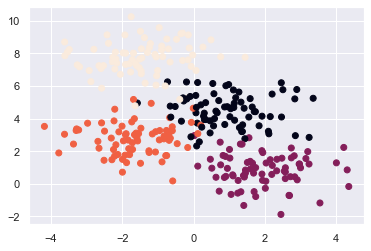

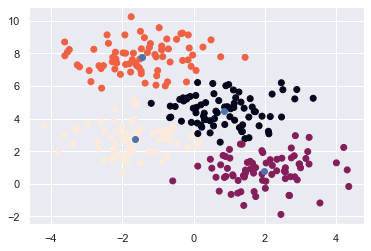

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


from sklearn.datasets import make_blobs, make_moons
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c = y_true)
plt.show()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c =y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

## Evaluating clustering quality

Clustering is an unsupervised classification algorithm, which means it is not given the correct labels to train the model, and in practice one cannot compare the clustering labels with the true ones. Thus one can't usually know how well your clustering method did.

However, one can cluster a dataset with known correct labels, and then compare them against the generated labels (even though it's a bit artificial, since we could have used a supervised classification method.)

There are multiple methods for quantifying this comparison, but it can be summarized with the *confusion matrix*, which compares the number of points with different "true" labels (in array y_true) and the number of points with different k-means labels (in array y_kmeans).

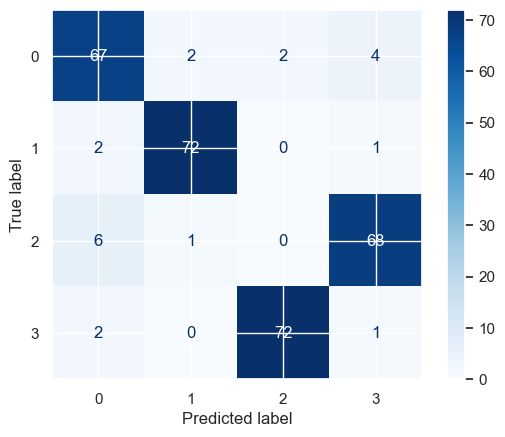

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_kmeans, cmap=plt.cm.Blues)
plt.show()


As you can see from the printed out confusion matrix, the labels assigned by the k-means algorithm are mostly correct, but they are in a different order than the "true" labels. To calculate prediction quality, we need to reoder the k-means labels to match the true labels. Here is one way to do this:

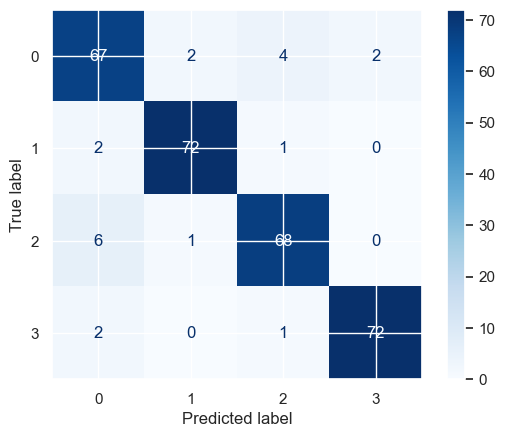

In [66]:
cm = confusion_matrix(y_true, y_kmeans)
label_list = np.arange(4)
correct_indices = cm.argmax(axis=1)
kmeans_correct = np.arange(len(y_kmeans))
for i in label_list:
    kmeans_correct[np.where(y_kmeans == correct_indices[i])] = i

ConfusionMatrixDisplay.from_predictions(y_true, kmeans_correct, cmap=plt.cm.Blues)

In [67]:
from sklearn.metrics import jaccard_score

jac = jaccard_score(y_true, kmeans_correct, average='weighted')

print("The Jaccard score: ", jac)

The Jaccard score:  0.8714708312747528


0.6064193548387097

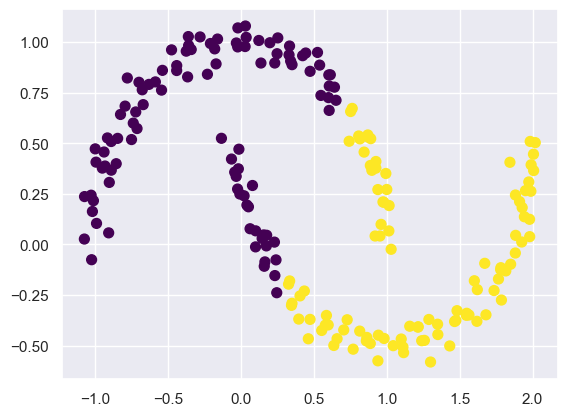

In [69]:
from sklearn.datasets import make_moons
X, y_true = make_moons(200, noise=.05, random_state=0)

y_kmeans = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,
            s=50, cmap='viridis');

cm = confusion_matrix(y_true, y_kmeans)
label_list = np.arange(2)
correct_indices = cm.argmax(axis=1)
kmeans_correct = np.arange(len(y_kmeans))
for i in label_list:
    kmeans_correct[np.where(y_kmeans == correct_indices[i])] = i

#ConfusionMatrixDisplay.from_predictions(y_true, kmeans_correct, cmap=plt.cm.Blues)

from sklearn.metrics import jaccard_score

jaccard_score(y_true, kmeans_correct, average='weighted')


/Users/dkon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


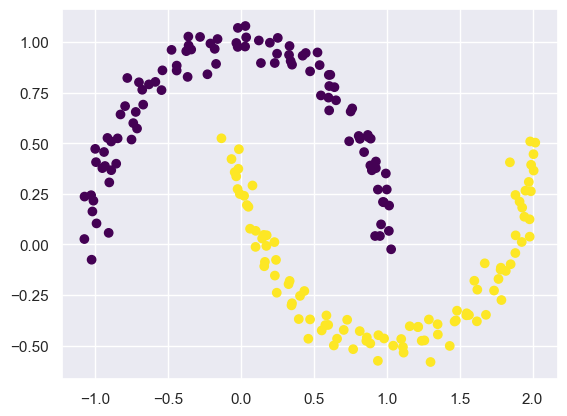

In [70]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis');

## Hierarchical clustering
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

(150, 2)


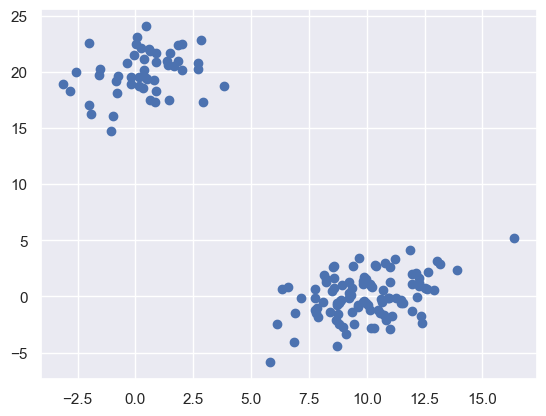

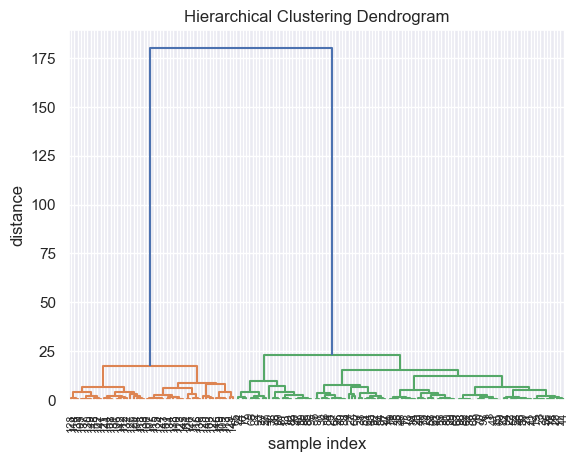

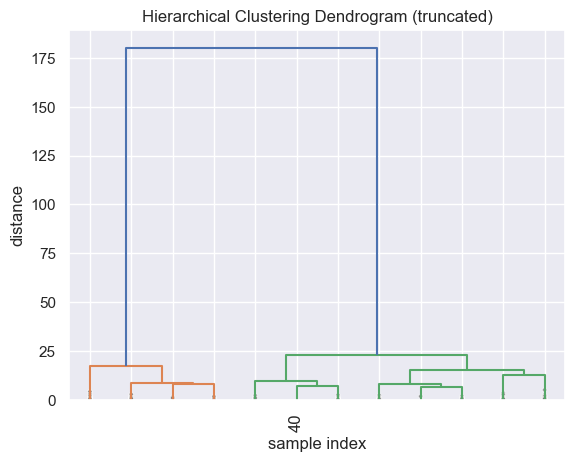

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()
# generate the linkage matrix
Z = linkage(X, 'ward')


# calculate full dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

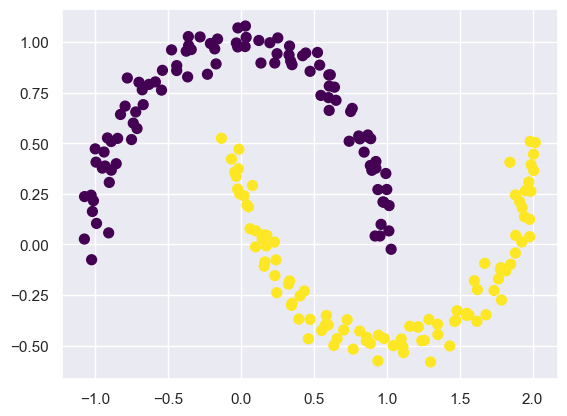

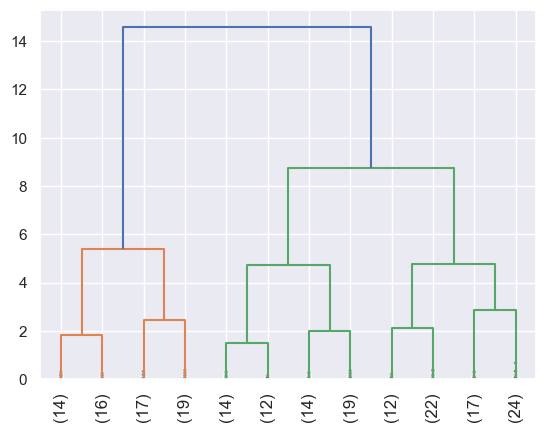

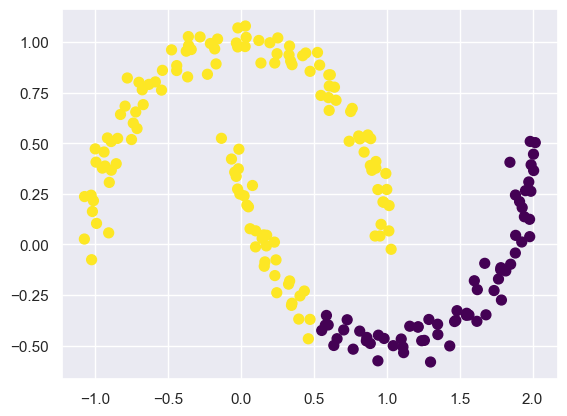

The Jaccard score:  0.7031343283582089


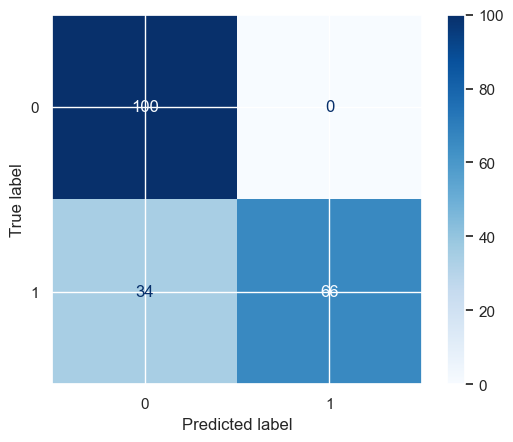

In [61]:
X, y_true = make_moons(200, noise=.05, random_state=0)


plt.scatter(X[:, 0], X[:, 1], c=y_true,
            s=50, cmap='viridis');
plt.show()

# generate the linkage matrix
Z = linkage(X, 'ward')
   
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

k = 2
clusters=fcluster(Z, k, criterion='maxclust')

plt.scatter(X[:, 0], X[:, 1], c=clusters,
            s=50, cmap='viridis');
plt.show()


cm = confusion_matrix(y_true, clusters)
label_list = np.arange(k)
correct_indices = cm.argmax(axis=1)
clust_correct = np.arange(len(clusters))
for i in label_list:
    clust_correct[np.where(clusters == correct_indices[i])] = i

ConfusionMatrixDisplay.from_predictions(y_true, clust_correct, cmap=plt.cm.Blues)


jac = jaccard_score(y_true, clust_correct, average='weighted')

print("The Jaccard score: ", jac)


## PCA followed by clustering

There are  684 samples
There are  9 variables
The principal components:
 [[ 0.29608754  0.40440772  0.39319471  0.33113661  0.24948846  0.44216136
   0.29310177  0.35418182  0.12421135]
 [-0.07812909  0.2310643   0.16563113 -0.09686907  0.19958789 -0.78108898
   0.01147465  0.46774073  0.18665333]]
Fraction of explained variance for each PC:
 [0.90573993 0.09426007]


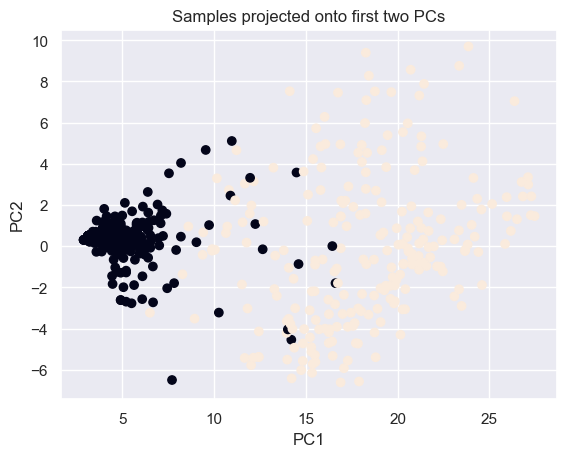

In [20]:
from sklearn.decomposition import PCA

wisc_data = np.loadtxt("Wisconsin_Breast_Cancers.csv", delimiter=',', skiprows=1)
nrows, ncols = wisc_data.shape
print("There are ", nrows, "samples")
print("There are ", (ncols -2), "variables" )

truth = wisc_data[:,ncols-1]
measured = wisc_data[:,1:(ncols-1)]
pca = PCA(n_components=2)
pca.fit(measured)

print("The principal components:\n", pca.components_)
print("Fraction of explained variance for each PC:\n", pca.explained_variance_/sum(pca.explained_variance_))

# project the data onto PCs
new_coor = measured@pca.components_[:2,:].T
plt.scatter(new_coor[:, 0], new_coor[:, 1], c= truth)
plt.title('Samples projected onto first two PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

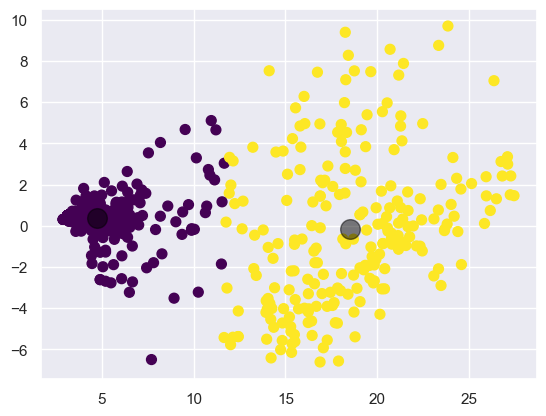

In [21]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(new_coor)
y_kmeans = kmeans.predict(new_coor)
plt.scatter(new_coor[:, 0], new_coor[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()